# Artificial Neural Network

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
dummies = pd.get_dummies(df[['Geography', 'Gender']], drop_first=True)

In [6]:
dummies.head()

,Geography_Germany,Geography_Spain,Gender_Male
0,0,0,0
1,0,1,0
2,0,0,0
3,0,0,0
4,0,1,0


In [7]:
df = pd.concat([df.drop(['Geography', 'Gender'], axis=1), dummies], axis=1)

In [8]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [9]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [10]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [11]:
X = df.drop('Exited', axis=1).values
y = df['Exited'].values

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
X_train = scaler.fit_transform(X_train)

In [17]:
X_test = scaler.transform(X_test)

In [18]:
model = tf.keras.models.Sequential()

In [19]:
model.add(tf.keras.layers.Dense(11, activation='relu'))
model.add(tf.keras.layers.Dense(6, activation='relu'))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=25, verbose=1)

In [21]:
model.fit(x=X_train, y=y_train, batch_size=32, validation_data=(X_test, y_test), epochs=10000, callbacks=[early_stop])

Train on 8000 samples, validate on 2000 samples
Epoch 1/10000
8000/8000 [==============================] - 1s 104us/sample - loss: 0.5241 - accuracy: 0.7796 - val_loss: 0.4629 - val_accuracy: 0.7975
Epoch 2/10000
8000/8000 [==============================] - 0s 31us/sample - loss: 0.4484 - accuracy: 0.7962 - val_loss: 0.4290 - val_accuracy: 0.8015
Epoch 3/10000
8000/8000 [==============================] - 0s 35us/sample - loss: 0.4273 - accuracy: 0.8016 - val_loss: 0.4162 - val_accuracy: 0.8170
Epoch 4/10000
8000/8000 [==============================] - 0s 36us/sample - loss: 0.4132 - accuracy: 0.8156 - val_loss: 0.4028 - val_accuracy: 0.8290
Epoch 5/10000
8000/8000 [==============================] - 0s 31us/sample - loss: 0.3972 - accuracy: 0.8305 - val_loss: 0.3856 - val_accuracy: 0.8455
Epoch 6/10000
8000/8000 [==============================] - 0s 35us/sample - loss: 0.3800 - accuracy: 0.8401 - val_loss: 0.3691 - val_accuracy: 0.8525
Epoch 7/10000
8000/8000 [==========================

In [22]:
loss_df = pd.DataFrame(model.history.history)

In [23]:
loss_df.head(2)

,loss,accuracy,val_loss,val_accuracy
0,0.524061,0.779625,0.462924,0.7975
1,0.448352,0.796250,0.428987,0.8015


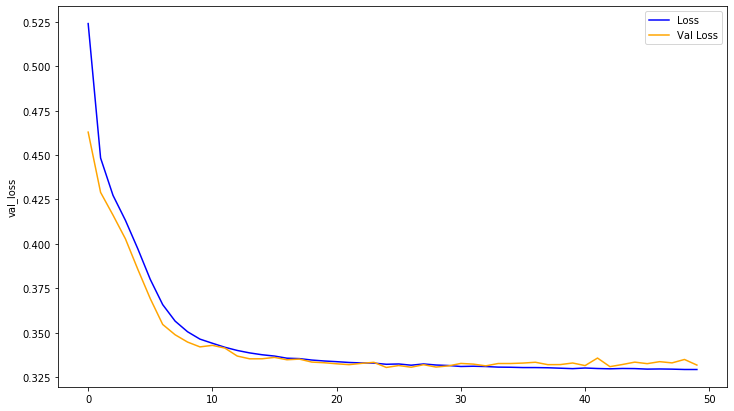

In [24]:
plt.figure(figsize=(12, 7))
sns.lineplot(y=loss_df['loss'], x=loss_df.index, color='blue', label='Loss')
sns.lineplot(y=loss_df['val_loss'], x=loss_df.index, color='orange', label='Val Loss')
plt.legend()

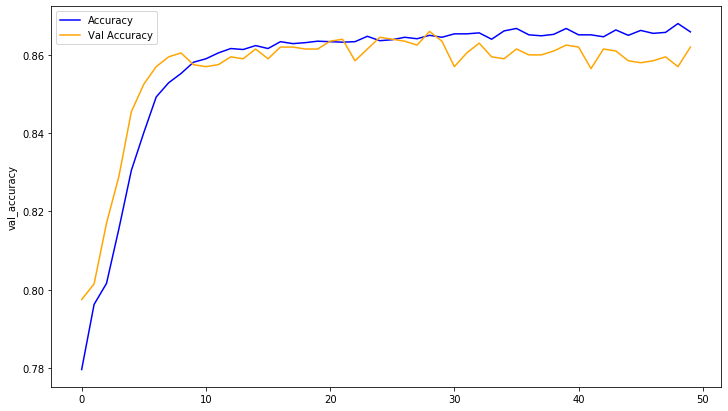

In [25]:
plt.figure(figsize=(12, 7))
sns.lineplot(y=loss_df['accuracy'], x=loss_df.index, color='blue', label='Accuracy')
sns.lineplot(y=loss_df['val_accuracy'], x=loss_df.index, color='orange', label='Val Accuracy')
plt.legend()

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [27]:
pred = model.predict_classes(X_test)

In [28]:
print(confusion_matrix(y_test, pred))
print(accuracy_score(y_test, pred))

[[1523   72]
 [ 204  201]]
0.862
